In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.9.0


In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
train_images.shape
len(train_labels)
train_labels

(60000, 28, 28)

60000

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

(10000, 28, 28)

10000

<Figure size 432x288 with 0 Axes>

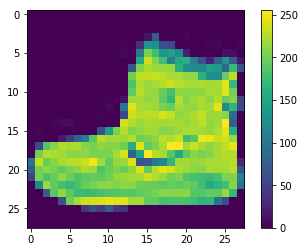

In [12]:
test_images.shape
len(test_labels)
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


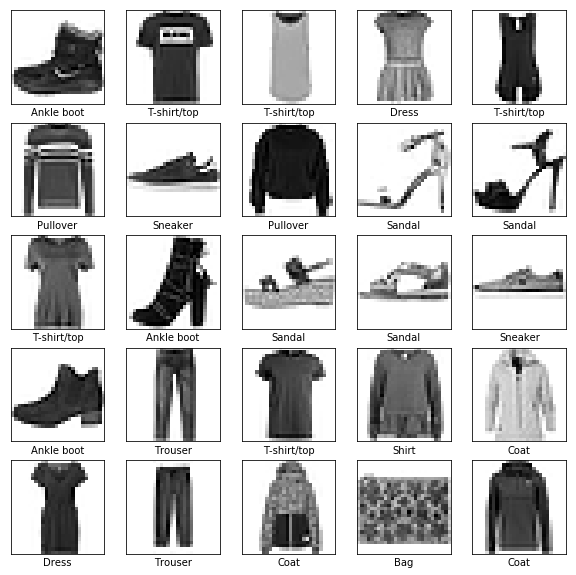

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0
import matplotlib.pyplot as plt
%matplotlib inline

_=plt.figure(figsize=(10,10))
for i in range(25):
    _=plt.subplot(5,5,i+1)
    _=plt.xticks([])
    _=plt.yticks([])
    _=plt.grid('off')
    _=plt.imshow(train_images[i], cmap=plt.cm.binary)
    _=plt.xlabel(class_names[train_labels[i]])

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [15]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 114us/step - loss: 0.4946 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 7s 111us/step - loss: 0.3759 - acc: 0.8636
Epoch 3/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.3382 - acc: 0.8767
Epoch 4/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.3124 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.2953 - acc: 0.8906


In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 47us/step
Test accuracy: 0.8743


In [18]:
predictions = model.predict(test_images)
predictions[0]
test_labels[0]

array([2.5926749e-05, 1.1050290e-07, 3.3313074e-06, 3.3150429e-06,
       3.6486833e-06, 1.3438051e-02, 6.4071908e-05, 1.1632215e-01,
       2.1353301e-03, 8.6800402e-01], dtype=float32)

9

c:\users\gmanish\appdata\local\continuum\anaconda\envs\r-tensorflow\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


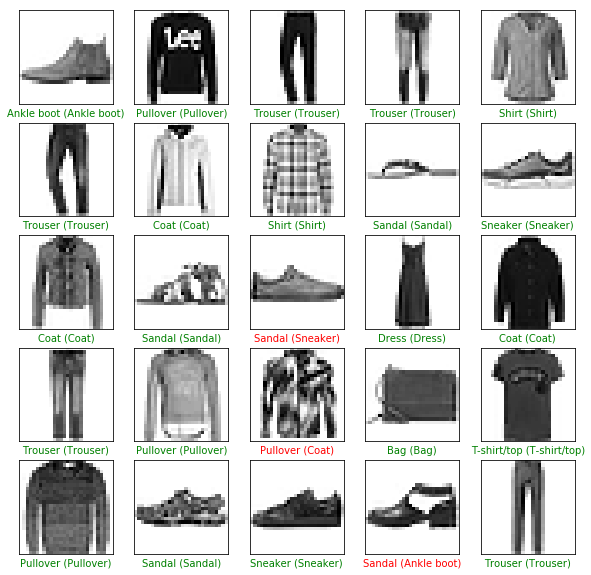

In [12]:
# Plot the first 25 test images, their predicted label, and the true label
# Color correct predictions in green, incorrect predictions in red
_=plt.figure(figsize=(10,10));
for i in range(25):
    _=plt.subplot(5,5,i+1);
    _=plt.xticks([]);
    _=plt.yticks([]);
    plt.grid('off');
    _=plt.imshow(test_images[i], cmap=plt.cm.binary);
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    if predicted_label == true_label:
      color = 'green'
    else:
      color = 'red'
    _=plt.xlabel("{} ({})".format(class_names[predicted_label], 
                                  class_names[true_label]),
                                  color=color);
      